In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
from IPython.display import display
import os

In [2]:
#leer todos los documentos
df_plans=pd.read_csv(os.path.join('..','DataFrames','megaline_plans.csv'))
df_calls=pd.read_csv(os.path.join('..','DataFrames','megaline_calls.csv'))
df_internet=pd.read_csv(os.path.join('..','DataFrames','megaline_internet.csv'))
df_messages=pd.read_csv(os.path.join('..','DataFrames','megaline_messages.csv'))
df_users=pd.read_csv(os.path.join('..','DataFrames','megaline_users.csv'))

In [3]:
#QUIERO SABER CUANTOS VALORES NULOS TIENE CADA DF
def vn(df):
    return df.isna().sum()
    

In [4]:
print(f'Plans:\n{vn(df_plans)}\n\nCalls:\n{vn(df_calls)}\n\nInternet:\n{vn(df_internet)}\n\nMessages:\n{vn(df_messages)}\n\nUsers:\n{vn(df_users)}')


Plans:
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Calls:
id           0
user_id      0
call_date    0
duration     0
dtype: int64

Internet:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Messages:
id              0
user_id         0
message_date    0
dtype: int64

Users:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [5]:
#VERIFICAR PLANS
display(df_plans.head())

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [6]:
#VERIFICAR CALLS
display(df_calls.head())

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [7]:
#VERIFICAR USERS
display(df_users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [8]:
#VERIFICAR INTERNET
display(df_internet.head())

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [9]:
#VERIFICAR MESSAGES 
display(df_messages.head())

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [10]:
#VER DESCRIPCION DE CADA DF
print(df_plans.describe())

       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.500000           26880.000000       2375.000000   
max          1000.000000           30720.000000       3000.000000   

       usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  
count         2.000000     2.00000         2.000000        2.000000  
mean         45.000000     8.50000         0.020000        0.020000  
std          35.355339     2.12132         0.014142        0.014142  
min          20.000000     7.00000         0.010000        0.010000  
25%          32.500000     7

In [11]:
print(df_users.describe())

           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000


## OBSERVACIONES


messages_included: El número promedio de mensajes incluidos en los planes es de 525, con un mínimo de 50 y un máximo de 1000. La desviación estándar es bastante alta (671.75), lo que indica una gran variabilidad en el número de mensajes incluidos en los planes.

mb_per_month_included: El promedio de megabytes incluidos por mes en los planes es de 23040 MB, con un mínimo de 15360 MB y un máximo de 30720 MB. La desviación estándar es de 10861.16, lo que indica una variabilidad moderada en los megabytes incluidos en los planes.

minutes_included: El número promedio de minutos incluidos en los planes es de 1750, con un mínimo de 500 y un máximo de 3000. La desviación estándar es de 1767.77, lo que indica una gran variabilidad en el número de minutos incluidos en los planes.

usd_monthly_pay: El pago mensual promedio en dólares de los planes es de 45, con un mínimo de 20 y un máximo de 70. La desviación estándar es de 35.36, lo que indica una gran variabilidad en los pagos mensuales de los planes.

usd_per_gb: El costo promedio por gigabyte es de 8.50, con un mínimo de 7 y un máximo de 10. La desviación estándar es de 2.12, lo que indica una variabilidad moderada en el costo por gigabyte.

usd_per_message: El costo promedio por mensaje es de 0.02, con un mínimo de 0.01 y un máximo de 0.03. La desviación estándar es de 0.01, lo que indica una variabilidad baja en el costo por mensaje.

usd_per_minute: El costo promedio por minuto es de 0.02, con un mínimo de 0.01 y un máximo de 0.03. La desviación estándar es de 0.01, lo que indica una variabilidad baja en el costo por minuto.

plan_name: Hay dos planes únicos en los datos, uno de los cuales es ‘ultimate’.

En cuanto a los problemas con los datos, no parece haber ninguno obvio basándose en esta descripción


In [12]:
#Ver datos unicos de cada df para visualizar alguna tendencia
#PARA ELLO CREARE UNA FUNCION
def unicos(df,columna):
    return df[columna].unique()


In [13]:
dfs={
    'PLANS':df_plans,
    'INTERNET':df_internet,
    'CALLS':df_calls,
    'MESSAGES':df_messages,
    'USERS':df_users
}
for name,df in dfs.items():
    print(f'\n{name}:\n{df.columns}\n')



PLANS:
Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')


INTERNET:
Index(['id', 'user_id', 'session_date', 'mb_used'], dtype='object')


CALLS:
Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')


MESSAGES:
Index(['id', 'user_id', 'message_date'], dtype='object')


USERS:
Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')



In [14]:
#SABER CANTIDAD DE DATOS QUE TIENEN USERS, MESSAGES,CALLS, INTERNET
for name,df in dfs.items():
    print(f'\n{name}:\n{df.count()}\n')


PLANS:
messages_included        2
mb_per_month_included    2
minutes_included         2
usd_monthly_pay          2
usd_per_gb               2
usd_per_message          2
usd_per_minute           2
plan_name                2
dtype: int64


INTERNET:
id              104825
user_id         104825
session_date    104825
mb_used         104825
dtype: int64


CALLS:
id           137735
user_id      137735
call_date    137735
duration     137735
dtype: int64


MESSAGES:
id              76051
user_id         76051
message_date    76051
dtype: int64


USERS:
user_id       500
first_name    500
last_name     500
age           500
city          500
reg_date      500
plan          500
churn_date     34
dtype: int64



In [15]:
display(df_calls['call_date'].head())

0    2018-12-27
1    2018-12-27
2    2018-12-27
3    2018-12-28
4    2018-12-30
Name: call_date, dtype: object

Conversión de unidades: Dado que los datos de Megaline se redondean a minutos y gigabytes, podrías considerar convertir todas las duraciones de llamadas y los volúmenes de datos a estas unidades para facilitar el análisis.

Cálculo de costos: Podrías calcular el costo mensual total para cada usuario en función de su uso y el plan que tienen. Esto podría implicar sumar el costo mensual del plan y cualquier costo adicional por exceder los límites del plan.

Análisis temporal: Podrías agregar columnas para el mes, el día de la semana o la hora del día para las llamadas, los mensajes y las sesiones de internet. Esto podría permitirte analizar si hay patrones en el uso en función del tiempo.

Datos demográficos: Si tienes acceso a más datos demográficos sobre los usuarios además de su ciudad de residencia, podrías agregar estos a tus datos. Esto podría incluir cosas como la edad, el género, la ocupación, etc.

In [16]:
#AGREGAR A CALLS DURACION POR MINUTO
df_calls['duration_per_minute']=df_calls['duration']/60
#SECCIONAR CALL DATE EN DIA, MES Y YEAR
df_calls['call_date']=pd.to_datetime(df_calls['call_date'])
df_calls['call_day']=df_calls['call_date'].dt.day
df_calls['call_month']=df_calls['call_date'].dt.month
df_calls['call_year']=df_calls['call_date'].dt.year

In [17]:
#VERIFICAR QUE LAS COLUMNAS FUERON AGREGADAS
display(df_calls.sample(1))

,id,user_id,call_date,duration,duration_per_minute,call_day,call_month,call_year
33807,1126_667,1126,2018-12-15,14.01,0.2335,15,12,2018


In [18]:
#AGREGAR A INTERNET LOS GB USADOS Y NO SOLO LOS MB USADOS, PARA ESO DIVIDIREMOS MB USADOS/1024 YA QUE '1GB ES 1024 MB'
df_internet['gb_used']=df_internet['mb_used']/1024
df_internet['session_date']=pd.to_datetime(df_internet['session_date'])
df_internet['session_day']=df_internet['session_date'].dt.day
df_internet['session_month']=df_internet['session_date'].dt.month
df_internet['session_year']=df_internet['session_date'].dt.year

In [19]:
#VERIFICAR QUE SE HAYAN AGREGADO LOS DATOS
display(df_internet.sample(1))

,id,user_id,session_date,mb_used,gb_used,session_day,session_month,session_year
48390,1215_112,1215,2018-10-14,773.48,0.755352,14,10,2018


In [20]:
#AGREGAR LA SECCION DE MESSAGES 'message_date'
df_messages['message_date']=pd.to_datetime(df_messages['message_date'])
df_messages['message_day']=df_messages['message_date'].dt.day
df_messages['message_month']=df_messages['message_date'].dt.month
df_messages['message_year']=df_messages['message_date'].dt.year

In [21]:
#VERIFICAR QUE SE HAYAN AGREGADO LOS DATOS
display(df_messages.sample(1))

,id,user_id,message_date,message_day,message_month,message_year
1747,1017_97,1017,2018-12-28,28,12,2018


In [22]:
display(df_users.sample())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
471,1471,Britni,Mitchell,59,"Richmond, VA MSA",2018-10-13,surf,NaN


In [23]:
#AGREGAR LAS COLUMNAS REGISTER DAY, MONTH, YEAR
df_users['reg_date']=pd.to_datetime(df_users['reg_date'])
df_users['reg_day']=df_users['reg_date'].dt.day
df_users['reg_month']=df_users['reg_date'].dt.month
df_users['reg_year']=df_users['reg_date'].dt.year


In [24]:
#VERIFICAR COLUMNAS
display(df_users.sample())


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_day,reg_month,reg_year
28,1028,Jefferey,Rasmussen,57,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-02-21,ultimate,NaN,21,2,2018


In [25]:
display(df_users)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_day,reg_month,reg_year
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,24,12,2018
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,13,8,2018
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,21,10,2018
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,28,1,2018
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,23,5,2018
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,4,9,2018
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,20,2,2018
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,10,12,2018
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,4,2,2018


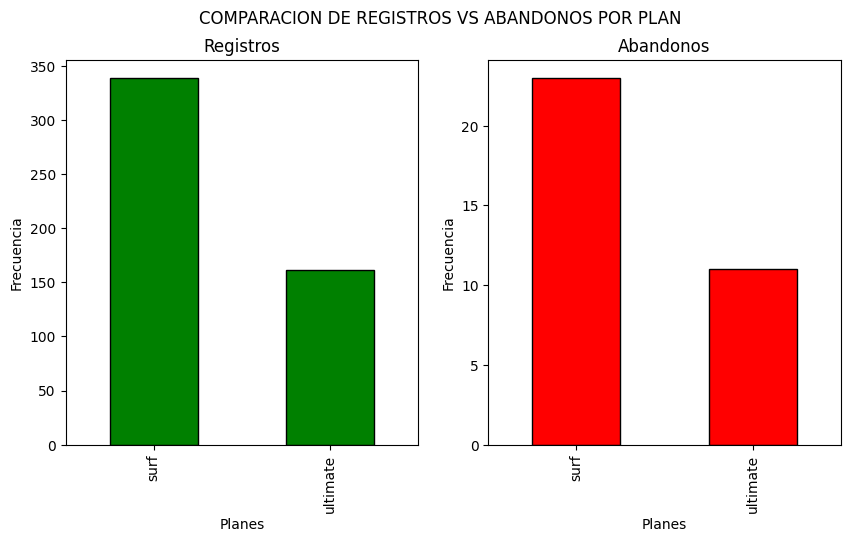

In [31]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
plt.suptitle('COMPARACION DE REGISTROS VS ABANDONOS POR PLAN')
df_users.groupby('plan')['reg_date'].count().plot(kind='bar',edgecolor='black',color='green',ax=axes[0])
axes[0].set_ylabel('Frecuencia')
axes[0].set_xlabel('Planes')
axes[0].set_title('Registros')
df_users.groupby('plan')['churn_date'].count().plot(kind='bar',edgecolor='black',color='red',ax=axes[1])
axes[1].set_ylabel('Frecuencia')
axes[1].set_xlabel('Planes')
axes[1].set_title('Abandonos')
plt.show()




In [27]:
# Relacionamos USERS con MESSAGES usando 'user_id'
datos = pd.merge( df_users,df_messages, on='user_id')


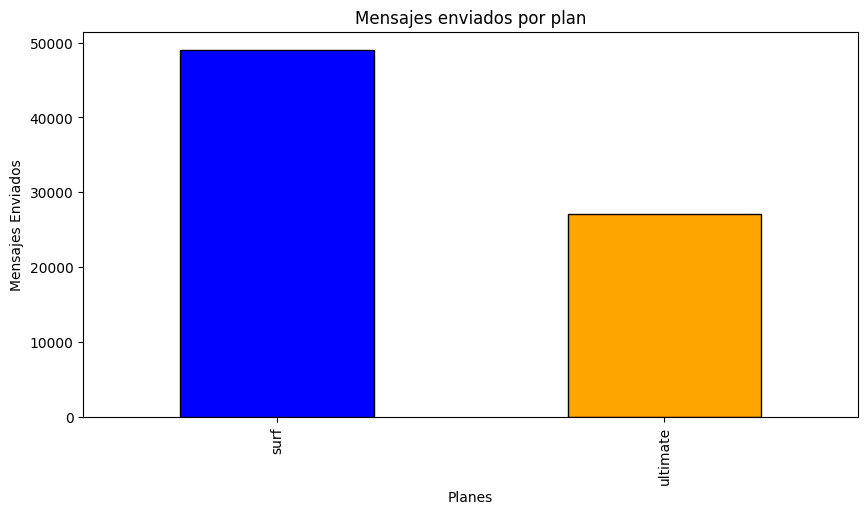

In [28]:
datos.groupby('plan')['message_date'].count().plot(kind='bar',edgecolor='black',figsize=(10,5),color=['blue','orange'])
plt.title('Mensajes enviados por plan')
plt.ylabel('Mensajes Enviados')
plt.xlabel('Planes')
plt.show()

In [29]:
for name,df in dfs.items():
    print(f'\n{name}:\n{df.count()}\n')


PLANS:
messages_included        2
mb_per_month_included    2
minutes_included         2
usd_monthly_pay          2
usd_per_gb               2
usd_per_message          2
usd_per_minute           2
plan_name                2
dtype: int64


INTERNET:
id               104825
user_id          104825
session_date     104825
mb_used          104825
gb_used          104825
session_day      104825
session_month    104825
session_year     104825
dtype: int64


CALLS:
id                     137735
user_id                137735
call_date              137735
duration               137735
duration_per_minute    137735
call_day               137735
call_month             137735
call_year              137735
dtype: int64


MESSAGES:
id               76051
user_id          76051
message_date     76051
message_day      76051
message_month    76051
message_year     76051
dtype: int64


USERS:
user_id       500
first_name    500
last_name     500
age           500
city          500
reg_date      500
plan